### Importing Libraries

To work with data and create visualizations, we will import the following libraries:

- **`pandas`**: A powerful library for data manipulation and analysis, providing data structures like DataFrames.
- **`numpy`**: A library for numerical operations, useful for working with arrays and performing mathematical computations.
- **`matplotlib.pyplot`**: A plotting library for creating a variety of static, animated, and interactive plots.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Setting the Random Seed

To ensure reproducibility of our results, we set the random seed. This allows us to generate the same random numbers every time we run our code.


In [7]:
np.random.seed(42)

### Generating Sample Data

We will generate sample data for car fuel efficiency. This includes creating random weights for the cars and calculating their fuel efficiency with some added noise.

In [8]:
n_samples = 100
weights = np.random.randint(1000, 2500, n_samples)  # Weight in kg
base_efficiency = 5 + (weights - 1000) * 0.005  # Base L/100km
noise = np.random.normal(0, 0.5, n_samples)  # Add some noise
efficiency = np.clip(base_efficiency + noise, 4, 15)  # Ensure realistic range

### Creating the DataFrame

We will create a DataFrame using the generated weights and fuel efficiency data. This DataFrame will include two columns: `weight_kg` and `fuel_efficiency_l_100km`.


In [9]:
df = pd.DataFrame({
    'weight_kg': weights,
    'fuel_efficiency_l_100km': np.round(efficiency, 2)
})

### Adding Manufacturer and Model Year Columns

We will extend our DataFrame by adding two new columns: `manufacturer` and `model_year`. The `manufacturer` column will contain random choices from a set of car manufacturers, and the `model_year` column will include random model years.


In [10]:
df['manufacturer'] = np.random.choice(['Tata', 'Mahindra', 'Maruti Suzuki', 'Hyundai', 'Honda'], n_samples)
df['model_year'] = np.random.randint(2015, 2024, n_samples)


### Sorting the DataFrame

To organize our data, we'll sort the DataFrame by the `weight_kg` column and reset the index to ensure it is sequential.


In [11]:
df = df.sort_values('weight_kg').reset_index(drop=True)


### Display the first few rows

#### output~

| weight_kg | fuel_efficiency_l_100km |  manufacturer  | model_year |
|-----------|-------------------------|----------------|------------|
|    1013   |          4.05            |    Hyundai     |    2021    |
|    1020   |          4.00            | Maruti Suzuki  |    2015    |
|    1021   |          5.11            |   Mahindra     |    2018    |
|    1034   |          4.96            |     Honda      |    2021    |
|    1087   |          6.02            | Maruti Suzuki  |    2016    |


In [12]:

print(df.head())

   weight_kg  fuel_efficiency_l_100km   manufacturer  model_year
0       1013                     4.05        Hyundai        2021
1       1020                     4.00  Maruti Suzuki        2015
2       1021                     5.11       Mahindra        2018
3       1034                     4.96          Honda        2021
4       1087                     6.02  Maruti Suzuki        2016


### Save to CSV
#### output~
Dataset saved to 'car_fuel_efficiency_data.csv'

In [13]:

df.to_csv('car_fuel_efficiency_data.csv', index=False)
print("\nDataset saved to 'car_fuel_efficiency_data.csv'")


Dataset saved to 'car_fuel_efficiency_data.csv'


### CarFuelEfficiencyPredictor Class

The `CarFuelEfficiencyPredictor` class implements a simple linear regression model to predict fuel efficiency based on car weight. It includes methods for training the model, making predictions, and evaluating its performance.

#### Methods:

- **`__init__`**: Initializes the predictor with default slope and intercept values.
  
- **`train(X, y)`**: Trains the model using simple linear regression. It calculates the slope and intercept based on the provided data, where `X` represents car weights and `y` represents fuel efficiency values.

- **`predict(X)`**: Predicts fuel efficiency (L/100km) for given car weights. It uses the trained model to provide predictions.

- **`mean_squared_error(X, y)`**: Calculates the mean squared error (MSE) of the model. MSE is a measure of the average squared difference between the predicted and actual values.

- **`r_squared(X, y)`**: Calculates the R-squared score of the model. The R-squared score indicates how well the model explains the variability of the response variable compared to the mean.

This class is designed to provide basic functionality for linear regression analysis, allowing you to understand and predict car fuel efficiency based on weight.


In [14]:

class CarFuelEfficiencyPredictor:
    def __init__(self):
        self.slope = 0
        self.intercept = 0
     
    def train(self, X, y):
        """Train the model using simple linear regression."""
        X_mean = np.mean(X)
        y_mean = np.mean(y)
     
        numerator = np.sum((X - X_mean) * (y - y_mean))
        denominator = np.sum((X - X_mean)**2)
     
        self.slope = numerator / denominator
        self.intercept = y_mean - self.slope * X_mean
     
    def predict(self, X):
        """Predict L/100km for given car weights."""
        return self.slope * X + self.intercept
     
    def mean_squared_error(self, X, y):
        """Calculate the mean squared error of the model."""
        predictions = self.predict(X)
        return np.mean((y - predictions)**2)
     
    def r_squared(self, X, y):
        """Calculate the R-squared score of the model."""
        predictions = self.predict(X)
        ss_total = np.sum((y - np.mean(y))**2)
        ss_residual = np.sum((y - predictions)**2)
        return 1 - (ss_residual / ss_total)


### Load the dataset

In [15]:
df = pd.read_csv('car_fuel_efficiency_data.csv')

### Extracting Features and Target Variables

We will extract the features and target variables from our DataFrame. Here, `X` will be the car weights, and `y` will be the fuel efficiency values.


In [16]:

X = df['weight_kg'].values
y = df['fuel_efficiency_l_100km'].values


### Create and train the model

In [17]:

model = CarFuelEfficiencyPredictor()
model.train(X, y)

### Make predictions for new car weights

output~
**Predictions for New Car Weights:**

- **Car weight:** 1350 kg **Predicted Fuel Efficiency:** 6.73 L/100km

- **Car weight:** 1650 kg **Predicted Fuel Efficiency:** 8.26 L/100km

- **Car weight:** 1950 kg **Predicted Fuel Efficiency:** 9.79 L/100km



In [18]:

new_car_weights = np.array([1350, 1650, 1950])
predictions = model.predict(new_car_weights)

print("Predictions for new car weights:")
for weight, efficiency in zip(new_car_weights, predictions):
    print(f"Car weight: {weight} kg, Predicted Fuel Efficiency: {efficiency:.2f} L/100km")


Predictions for new car weights:
Car weight: 1350 kg, Predicted Fuel Efficiency: 6.73 L/100km
Car weight: 1650 kg, Predicted Fuel Efficiency: 8.26 L/100km
Car weight: 1950 kg, Predicted Fuel Efficiency: 9.79 L/100km


### Calculate and print error metrics
output~

**Mean Squared Error:** 0.2044  
**R-squared Score:** 0.9610


In [19]:

mse = model.mean_squared_error(X, y)
r2 = model.r_squared(X, y)
print(f"\nMean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")



Mean Squared Error: 0.2044
R-squared Score: 0.9610


### Visualize the data and predictions
To visualize the model's performance, we'll create a scatter plot of the actual data and a line plot of the predicted values. Additionally, we'll plot new predictions with different car weights.


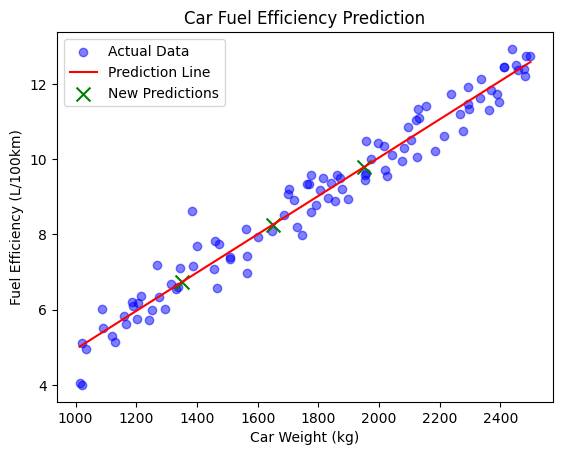

In [20]:



plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Prediction Line')
plt.scatter(new_car_weights, predictions, color='green', marker='x', s=100, label='New Predictions')
plt.xlabel('Car Weight (kg)')
plt.ylabel('Fuel Efficiency (L/100km)')
plt.title('Car Fuel Efficiency Prediction')
plt.legend()
plt.show()
